**Objetivo** 

Queremos encontrar novas usinas para poder atender mais consumidores. Assim, buscamos aumentar nossa capacidade de fornecimento de energia em 7 GWh/mês daqui a 2 anos (ou seja, no final de 2 anos queremos ter nossa capacidade mensal + 7 GWh/mês).

**Premissas** 

1- Considere que nenhuma das usinas listadas é nosso cliente atualmente.\
2- Temos dois tipos de clientes: quem gera energia (usinas) e quem consome (clientes).\
3- Lembre-se que estamos simulando um caso real e, por isso, os dados não serão perfeitos.\
4- Lembre-se que trabalhamos apenas com fontes sustentáveis de energia.\

**Informações Adicionais**

Tempo de produção de energia por dia (em horas)

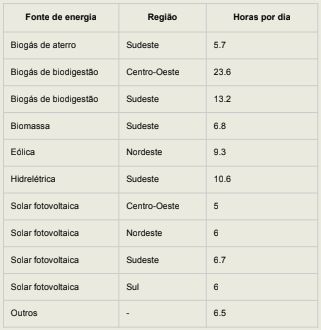

In [1]:
##importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import circlify
import numpy as np

import statsmodels.api as sm

In [2]:
classe_consumo = pd.read_csv('aneel_empreendimentos_geracao_distribuida_classe_consumo.csv')

coord_sub_empreendimentos = pd.read_csv('aneel_empreendimentos_geracao_distribuida_coordenadas_subestacao_vinculada_empreendimentos_gd.csv')

distribuidoras = pd.read_csv('aneel_empreendimentos_geracao_distribuida_distribuidoras.csv', dtype={"NumCNPJDistribuidora": "string"})

empreendimentos = pd.read_csv('aneel_empreendimentos_geracao_distribuida_empreendimentos_gd.csv', dtype={"NumCNPJDistribuidora": "string"})

grupo_tarifario = pd.read_csv('aneel_empreendimentos_geracao_distribuida_grupo_tarifario.csv')

loc_empreendimentos = pd.read_csv('aneel_empreendimentos_geracao_distribuida_localizacao_empreendimentos_gd.csv')

mod_empreendimentos = pd.read_csv('aneel_empreendimentos_geracao_distribuida_modalidade_empreendimentos_gd.csv')

municipio = pd.read_csv('aneel_empreendimentos_geracao_distribuida_municipio.csv')

regiao = pd.read_csv('aneel_empreendimentos_geracao_distribuida_regiao.csv')

tipo_geracao_empreendimentos = pd.read_csv('aneel_empreendimentos_geracao_distribuida_tipo_geracao_empreendimentos_gd.csv')

titular_empreendimentos = pd.read_csv('aneel_empreendimentos_geracao_distribuida_titular_empreendimentos_gd.csv', dtype={"NumCPFCNPJ": "string", "CodEmpreendimento": "string"})


In [3]:
classe_consumo.head()

,CodClasseConsumo,DscClasseConsumo
0,5,Poder Público
1,4,Industrial
2,6,Serviço Público
3,2,Comercial
4,3,Rural


In [4]:
coord_sub_empreendimentos.head()

,NomSubEstacao,NumCoordESub,NumCoordNSub
0,NaN,NaN,NaN
1,TOLEDO,-5376.0,-2474.0
2,CAXIAS DO SUL 5,-5119.0,-2913.0
3,CANOAS 1 - CEEE,-5119.0,-2995.0
4,OURO PRETO 1,-4351.0,-2039.0


In [5]:
distribuidoras.head()

,NumCNPJDistribuidora,SigAgente,NomAgente
0,60444437000146,LIGHT,LIGHT SERVIÇOS DE ELETRICIDADE S A
1,95824322000161,COOPERLUZ,COOPERLUZ - COOPERATIVA DISTRIBUIDORA DE ENERG...
2,2328280000197,ELEKTRO,ELEKTRO REDES S.A.
3,4065033000170,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A
4,55188502000180,CERVAM,COOPERATIVA DE ENERGIZA�ÃO E DE DESENVOLVIMENT...


In [6]:
empreendimentos.head()

,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,SigTipoGeracao,DscPorte,QtdUCRecebeCredito,MdaPotenciaInstaladaKW,NomSubEstacao,NumCNPJDistribuidora
0,GD.SP.000.797.345,2022-01-10,P,UFV,Microgeracao,1,0,NaN,7282377000120
1,GD.SP.000.798.033,2019-03-08,P,UFV,Microgeracao,1,0,NaN,7282377000120
2,GD.SP.001.412.142,2022-06-30,P,UFV,Microgeracao,1,0,NaN,7282377000120
3,GD.PR.001.230.147,2022-04-28,P,UFV,Microgeracao,1,0,NaN,4368898000106
4,GD.SP.001.455.164,2022-06-01,P,UFV,Microgeracao,1,0,NaN,7282377000120


In [7]:
grupo_tarifario.head()

,CodSubGrupoTarifario,DscSubGrupoTarifario
0,7,A4
1,11,B3
2,10,B2
3,5,A3
4,9,B1


In [8]:
loc_empreendimentos.head()

,CodEmpreendimento,codUFibge,SigUF,codRegiao,CodMunicipioIbge,NumCoordNEmpreendimento,NumCoordEEmpreendimento
0,GD.BA.001.280.974,NaN,NaN,NaN,NaN,NaN,NaN
1,GD.SP.000.641.779,NaN,NaN,NaN,NaN,-2100.0,-5107.0
2,GD.BA.001.223.830,NaN,NaN,NaN,NaN,NaN,NaN
3,GD.BA.001.106.264,NaN,NaN,NaN,NaN,NaN,NaN
4,GD.BA.001.105.516,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mod_empreendimentos.head()

,SigModalidadeEmpreendimento,DscModalidadeHabilitado
0,M,Integrante de empreendimento de Multiplas UC
1,,NaN
2,P,Com Microgeracao ou Minigeracao distribuida
3,R,Caracterizada como Autoconsumo remoto
4,C,Caracterizada como Geracao compartilhada


In [10]:
municipio.head()

,CodMunicipioIbge,NomMunicipio
0,NaN,NaN
1,2605301.0,Exu
2,2305803.0,Ipu
3,3523909.0,Itu
4,3138807.0,Luz


In [11]:
regiao.head()

,codRegiao,NomRegiao
0,4102.0,Sul
1,4304.0,Sul
2,4202.0,Sul
3,4103.0,Sul
4,NaN,Sul


In [12]:
tipo_geracao_empreendimentos.head()

,SigTipoGeracao,DscFonteGeracao
0,CGH,Potencial hidráulico
1,EOL,Cinética do vento
2,UFV,Radia�ão solar
3,UTE,Bagaço de Cana de A�úcar
4,UTE,Resíduos Florestais


In [13]:
titular_empreendimentos.head()

,NumCPFCNPJ,SigTipoConsumidor,CodCEP,NomeTitularEmpreendimento,CodEmpreendimento
0,<NA>,NaN,NaN,NaN,GD.SC.000.202.855
1,<NA>,NaN,NaN,NaN,GD.RS.000.101.482
2,***.495.871-**,PF,\t7174***,***,GD.DF.000.012.137
3,***.221.290-**,PF,\t9693***,***,GD.RS.001.361.009
4,***.670.679-**,PF,00000***,***,GD.SC.000.188.599


In [14]:
## realizando limpeza dos dados

regiao.dropna(inplace=True)
coord_sub_empreendimentos.dropna(inplace=True)
mod_empreendimentos.dropna(inplace=True)
municipio.dropna(inplace=True)



In [15]:
## join das "tabelas dominio" de empreendimentos

empreendimentos = empreendimentos.merge(mod_empreendimentos, on="SigModalidadeEmpreendimento", how="left") \
                         .merge(tipo_geracao_empreendimentos, on="SigTipoGeracao", how="left") \
                         .merge(distribuidoras, on="NumCNPJDistribuidora", how="left") \
                         .merge(titular_empreendimentos, on="CodEmpreendimento", how="left") \
                         .merge(coord_sub_empreendimentos, on="NomSubEstacao", how="left") 

In [16]:
## join das informações de localização

loc = loc_empreendimentos.merge(regiao, on="codRegiao", how="left") \
                              .merge(municipio, on="CodMunicipioIbge", how="left")

In [17]:
empreendimentos = empreendimentos.merge(loc, on="CodEmpreendimento", how="left")

In [18]:
empreendimentos.head()

,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,SigTipoGeracao,DscPorte,QtdUCRecebeCredito,MdaPotenciaInstaladaKW,NomSubEstacao,NumCNPJDistribuidora,DscModalidadeHabilitado,...,NumCoordESub,NumCoordNSub,codUFibge,SigUF,codRegiao,CodMunicipioIbge,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomRegiao,NomMunicipio
0,GD.SP.000.797.345,2022-01-10,P,UFV,Microgeracao,1,0,NaN,7282377000120,Com Microgeracao ou Minigeracao distribuida,...,NaN,NaN,35.0,SP,3508.0,3509106.0,NaN,NaN,Sudeste,Caiuá
1,GD.SP.000.798.033,2019-03-08,P,UFV,Microgeracao,1,0,NaN,7282377000120,Com Microgeracao ou Minigeracao distribuida,...,NaN,NaN,35.0,SP,3508.0,3541406.0,NaN,NaN,Sudeste,Presidente Prudente
2,GD.SP.001.412.142,2022-06-30,P,UFV,Microgeracao,1,0,NaN,7282377000120,Com Microgeracao ou Minigeracao distribuida,...,NaN,NaN,35.0,SP,3508.0,3541406.0,NaN,NaN,Sudeste,Presidente Prudente
3,GD.PR.001.230.147,2022-04-28,P,UFV,Microgeracao,1,0,NaN,4368898000106,Com Microgeracao ou Minigeracao distribuida,...,NaN,NaN,41.0,PR,4106.0,4117909.0,NaN,NaN,Sul,Palotina
4,GD.SP.001.455.164,2022-06-01,P,UFV,Microgeracao,1,0,NaN,7282377000120,Com Microgeracao ou Minigeracao distribuida,...,NaN,NaN,35.0,SP,3508.0,3529203.0,NaN,NaN,Sudeste,Martinópolis


In [19]:
## optei por excluir terméletricas e hidrelétricas por impactarem negativamente o meio ambiente

empreendimentos = empreendimentos[(empreendimentos['SigTipoGeracao'] != 'CGH') & (empreendimentos['SigTipoGeracao'] != 'UTE')]

In [20]:
## não tenho 100% de domínio do negócio, mas exclui  autoconsumo remoto e microgeração ou minigeração distribuída por acreditar que se tratavam de modalidades de geração para consumo próprio

empreendimentos = empreendimentos[(empreendimentos['SigModalidadeEmpreendimento'] != 'P') & (empreendimentos['SigModalidadeEmpreendimento'] != 'R')]

In [21]:
## exclui as linhas com a modalidade "vazia" porque preferia não recomendar uma usina sem informações suficientes

empreendimentos = empreendimentos[~empreendimentos['SigModalidadeEmpreendimento'].str.strip().eq('')]

In [22]:
## exclui PF pois o foco era PJ (case)

empreendimentos = empreendimentos[(empreendimentos['SigTipoConsumidor'] == 'PJ')]

In [23]:
empreendimentos

,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,SigTipoGeracao,DscPorte,QtdUCRecebeCredito,MdaPotenciaInstaladaKW,NomSubEstacao,NumCNPJDistribuidora,DscModalidadeHabilitado,...,NumCoordESub,NumCoordNSub,codUFibge,SigUF,codRegiao,CodMunicipioIbge,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomRegiao,NomMunicipio
332,GD.SP.000.130.196,2019-10-30,C,UFV,Minigeracao,11,96000,NaN,33050196000188,Caracterizada como Geracao compartilhada,...,NaN,NaN,35.0,SP,3506.0,3538709.0,NaN,NaN,Sudeste,Piracicaba
2001,GD.SP.000.035.148,2018-07-17,M,UFV,Microgeracao,15,1026,NaN,33050196000188,Integrante de empreendimento de Multiplas UC,...,NaN,NaN,35.0,SP,3507.0,3545803.0,NaN,NaN,Sudeste,Santa Bárbara D'Oeste
5277,GD.SC.000.175.093,2020-01-20,C,UFV,Microgeracao,4,1800,NaN,86449170000173,Caracterizada como Geracao compartilhada,...,NaN,NaN,42.0,SC,4206.0,4206207.0,NaN,NaN,Sul,Gravatal
5283,GD.SP.000.005.477,2016-11-18,M,UFV,Microgeracao,4,1800,NaN,33050196000188,Integrante de empreendimento de Multiplas UC,...,NaN,NaN,35.0,SP,3507.0,3509502.0,NaN,NaN,Sudeste,Campinas
5377,GD.RS.000.162.266,2019-12-13,C,UFV,Minigeracao,3,21000,NaN,90660754000160,Caracterizada como Geracao compartilhada,...,NaN,NaN,43.0,RS,4301.0,4321006.0,NaN,NaN,Sul,Tapera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599192,GD.SP.000.424.698,2021-02-21,C,UFV,Microgeracao,3,500,NaN,33050196000188,Caracterizada como Geracao compartilhada,...,NaN,NaN,35.0,SP,3502.0,3539004.0,-2292.0,-4935.0,Sudeste,Pirangi
1600736,GD.PB.000.011.001,2017-05-10,M,UFV,Microgeracao,5,500,NaN,9095183000140,Integrante de empreendimento de Multiplas UC,...,NaN,NaN,25.0,PB,2501.0,2503704.0,NaN,NaN,Nordeste,Cajazeiras
1601154,GD.MG.001.102.726,2022-07-18,M,UFV,Microgeracao,11,6900,NaN,6981180000116,Integrante de empreendimento de Multiplas UC,...,NaN,NaN,31.0,MG,3107.0,3134608.0,-1950.0,-4390.0,Sudeste,Jaboticatubas
1602386,GD.TO.000.092.046,2019-07-01,C,UFV,Minigeracao,2,11000,NaN,25086034000171,Caracterizada como Geracao compartilhada,...,NaN,NaN,17.0,TO,1701.0,1722081.0,NaN,NaN,Norte,Wanderlândia


In [24]:
## tradução da regra de negócio descrita na tabela no início do arquivo em código

regras = [
    (empreendimentos['SigTipoGeracao'] == 'EOL') & (empreendimentos['NomRegiao'] == 'Nordeste'),
    (empreendimentos['SigTipoGeracao'] == 'UFV') & (empreendimentos['NomRegiao'] == 'Centro Oeste'),
    (empreendimentos['SigTipoGeracao'] == 'UFV') & (empreendimentos['NomRegiao'] == 'Nordeste'),
    (empreendimentos['SigTipoGeracao'] == 'UFV') & (empreendimentos['NomRegiao'] == 'Sudeste'),
    (empreendimentos['SigTipoGeracao'] == 'UFV') & (empreendimentos['NomRegiao'] == 'Sul')
]

valores = [9.3, 5, 6, 6.7, 6]

empreendimentos['Geracao_Horas_Dia'] = np.select(regras, valores, default=6.5)


In [25]:
## calculo de gw/h para cada usina

empreendimentos['gwHora'] = (empreendimentos['MdaPotenciaInstaladaKW'] * empreendimentos['Geracao_Horas_Dia']) / 1000000

In [26]:
empreendimentos

,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,SigTipoGeracao,DscPorte,QtdUCRecebeCredito,MdaPotenciaInstaladaKW,NomSubEstacao,NumCNPJDistribuidora,DscModalidadeHabilitado,...,codUFibge,SigUF,codRegiao,CodMunicipioIbge,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomRegiao,NomMunicipio,Geracao_Horas_Dia,gwHora
332,GD.SP.000.130.196,2019-10-30,C,UFV,Minigeracao,11,96000,NaN,33050196000188,Caracterizada como Geracao compartilhada,...,35.0,SP,3506.0,3538709.0,NaN,NaN,Sudeste,Piracicaba,6.7,0.643200
2001,GD.SP.000.035.148,2018-07-17,M,UFV,Microgeracao,15,1026,NaN,33050196000188,Integrante de empreendimento de Multiplas UC,...,35.0,SP,3507.0,3545803.0,NaN,NaN,Sudeste,Santa Bárbara D'Oeste,6.7,0.006874
5277,GD.SC.000.175.093,2020-01-20,C,UFV,Microgeracao,4,1800,NaN,86449170000173,Caracterizada como Geracao compartilhada,...,42.0,SC,4206.0,4206207.0,NaN,NaN,Sul,Gravatal,6.0,0.010800
5283,GD.SP.000.005.477,2016-11-18,M,UFV,Microgeracao,4,1800,NaN,33050196000188,Integrante de empreendimento de Multiplas UC,...,35.0,SP,3507.0,3509502.0,NaN,NaN,Sudeste,Campinas,6.7,0.012060
5377,GD.RS.000.162.266,2019-12-13,C,UFV,Minigeracao,3,21000,NaN,90660754000160,Caracterizada como Geracao compartilhada,...,43.0,RS,4301.0,4321006.0,NaN,NaN,Sul,Tapera,6.0,0.126000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599192,GD.SP.000.424.698,2021-02-21,C,UFV,Microgeracao,3,500,NaN,33050196000188,Caracterizada como Geracao compartilhada,...,35.0,SP,3502.0,3539004.0,-2292.0,-4935.0,Sudeste,Pirangi,6.7,0.003350
1600736,GD.PB.000.011.001,2017-05-10,M,UFV,Microgeracao,5,500,NaN,9095183000140,Integrante de empreendimento de Multiplas UC,...,25.0,PB,2501.0,2503704.0,NaN,NaN,Nordeste,Cajazeiras,6.0,0.003000
1601154,GD.MG.001.102.726,2022-07-18,M,UFV,Microgeracao,11,6900,NaN,6981180000116,Integrante de empreendimento de Multiplas UC,...,31.0,MG,3107.0,3134608.0,-1950.0,-4390.0,Sudeste,Jaboticatubas,6.7,0.046230
1602386,GD.TO.000.092.046,2019-07-01,C,UFV,Minigeracao,2,11000,NaN,25086034000171,Caracterizada como Geracao compartilhada,...,17.0,TO,1701.0,1722081.0,NaN,NaN,Norte,Wanderlândia,6.5,0.071500


In [27]:
## visao GWh/mes por regiao

agrupa_regiao = empreendimentos.groupby('NomRegiao').agg({'gwHora': 'sum'}).reset_index()
agrupa_regiao

,NomRegiao,gwHora
0,Centro Oeste,4.429100
1,Nordeste,7.468290
2,Norte,6.592150
3,Sudeste,21.297364
4,Sul,2.889162


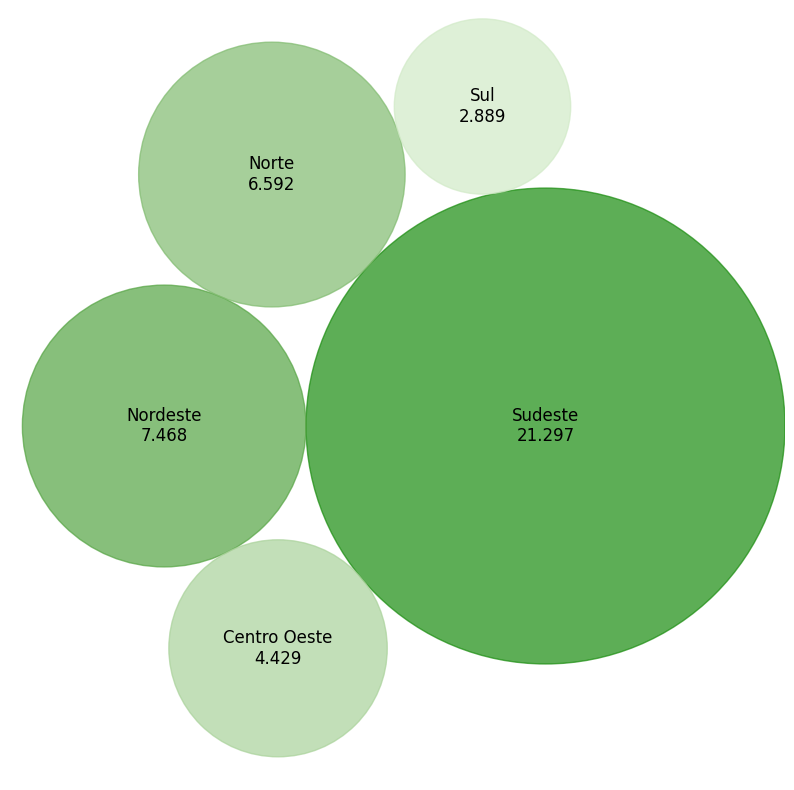

In [28]:
agrupa_regiao.sort_values(by='gwHora', ascending=False, inplace=True)

circles = circlify.circlify(agrupa_regiao['gwHora'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0))
circles.reverse()

labels = [f'{region}<br>{ratio:.3f}' for region, ratio in zip(agrupa_regiao['NomRegiao'], agrupa_regiao['gwHora'])]

color_palette = ['#198c0e', '#55a443', '#80bb6f', '#a9d29a', '#d1eac7']

fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.axis('off')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle, label, color in zip(circles, labels, color_palette):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7, color=color))
    plt.annotate(label.replace('<br>', '\n'), (x, y), size=12, va='center', ha='center', color='black')

plt.show()

In [29]:
## pensei em refazer essa visualização tratando pelo numero de UCs que recebem energia daquele empreendimento, mas não parecia fazer muito sentido


prop_agrupa_regiao = empreendimentos.groupby('NomRegiao').agg({'gwHora': 'sum', 'QtdUCRecebeCredito': 'sum'}).reset_index()
prop_agrupa_regiao['Potencia_UC_Ratio'] = prop_agrupa_regiao['gwHora'] / prop_agrupa_regiao['QtdUCRecebeCredito']
prop_agrupa_regiao['Potencia_UC_Ratio'] = prop_agrupa_regiao['Potencia_UC_Ratio'].round(2)
prop_agrupa_regiao = prop_agrupa_regiao.sort_values('Potencia_UC_Ratio', ascending=False)
prop_agrupa_regiao

,NomRegiao,gwHora,QtdUCRecebeCredito,Potencia_UC_Ratio
0,Centro Oeste,4.429100,453,0.01
1,Nordeste,7.468290,602,0.01
2,Norte,6.592150,927,0.01
3,Sudeste,21.297364,2159,0.01
4,Sul,2.889162,766,0.00


In [30]:
## visao GWh/mes por UF

agrupa_estado = empreendimentos.groupby('SigUF').agg({'gwHora': 'sum'}).reset_index()

In [31]:
agrupa_estado

,SigUF,gwHora
0,AL,0.213348
1,AM,2.276950
2,BA,0.431529
3,CE,4.650000
4,DF,3.429230
5,ES,0.278251
6,GO,0.839220
7,MA,0.503760
8,MG,5.155985
9,MS,0.160650


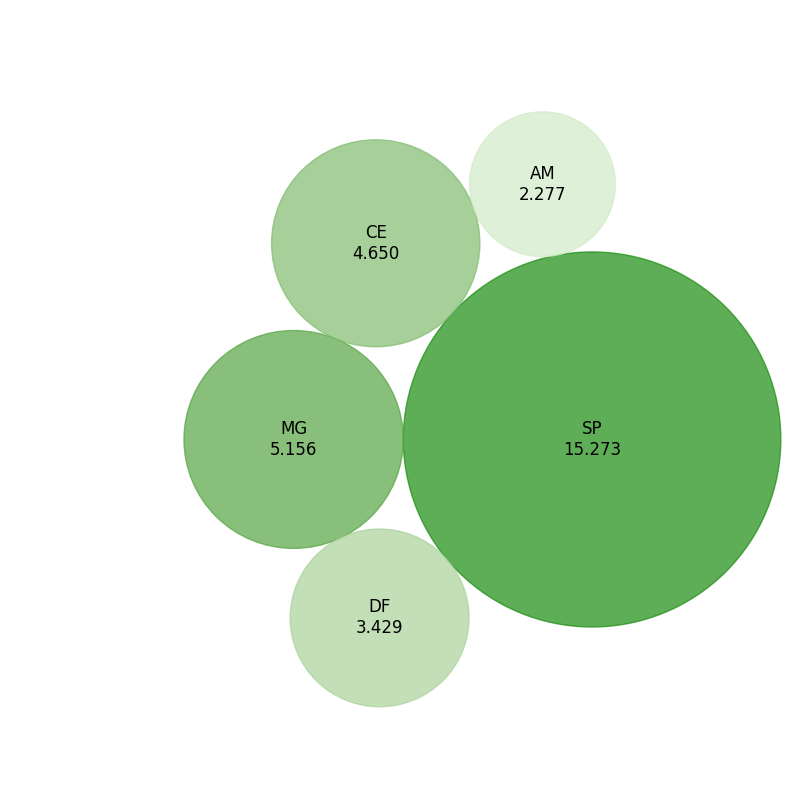

In [32]:
## mostrando somente os top 5 estados (por GWh/mes) para não poluir a visualização

agrupa_estado.sort_values(by='gwHora', ascending=False, inplace=True)

circles = circlify.circlify(agrupa_estado['gwHora'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0))
circles.reverse()

labels = [f'{region}<br>{ratio:.3f}' for region, ratio in zip(agrupa_estado['SigUF'], agrupa_estado['gwHora'])]

color_palette = ['#198c0e', '#55a443', '#80bb6f', '#a9d29a', '#d1eac7']

fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.axis('off')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle, label, color in zip(circles, labels, color_palette):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.7, color=color))
    plt.annotate(label.replace('<br>', '\n'), (x, y), size=12, va='center', ha='center', color='black')

plt.show()

In [33]:
## mesmo caso da visao das UCs por regiao, mantive essas celulas mas não acho que a análise seja pertinente

prop_agrupa_estado = empreendimentos.groupby('SigUF').agg({'gwHora': 'sum', 'QtdUCRecebeCredito': 'sum'}).reset_index()
prop_agrupa_estado['Potencia_UC_Ratio'] = prop_agrupa_estado['gwHora'] / prop_agrupa_estado['QtdUCRecebeCredito']
prop_agrupa_estado['Potencia_UC_Ratio'] = prop_agrupa_estado['Potencia_UC_Ratio'].round(2)
prop_agrupa_estado = prop_agrupa_estado.sort_values('Potencia_UC_Ratio', ascending=False)

In [34]:
prop_agrupa_estado

,SigUF,gwHora,QtdUCRecebeCredito,Potencia_UC_Ratio
3,CE,4.650000,29,0.16
18,RR,1.442090,36,0.04
10,PA,2.252738,80,0.03
0,AL,0.213348,24,0.01
22,SP,15.273246,1517,0.01
21,SE,0.449730,84,0.01
20,SC,0.907356,161,0.01
16,RN,0.142158,23,0.01
15,RJ,0.589881,102,0.01
13,PI,0.717000,65,0.01


**Regressão** 

Como podemos observar acima, grande parte da geração de energia distribuída está localizada na região Sudeste. Sendo assim, achei válido rodar uma regressão para esse parâmetro. Além disso, utilizei também a quantidade de Unidades Consumidoras e a Modalidade do Empreendimento, para fins exploratórios!

In [35]:
data_reg = empreendimentos[['SigModalidadeEmpreendimento',
                            'NomRegiao', 'QtdUCRecebeCredito', 'gwHora']].copy()
data_reg

,SigModalidadeEmpreendimento,NomRegiao,QtdUCRecebeCredito,gwHora
332,C,Sudeste,11,0.643200
2001,M,Sudeste,15,0.006874
5277,C,Sul,4,0.010800
5283,M,Sudeste,4,0.012060
5377,C,Sul,3,0.126000
...,...,...,...,...
1599192,C,Sudeste,3,0.003350
1600736,M,Nordeste,5,0.003000
1601154,M,Sudeste,11,0.046230
1602386,C,Norte,2,0.071500


In [36]:
# criando dummies para região e para modalidade de empreendimento

dummies = pd.get_dummies(data_reg[['SigModalidadeEmpreendimento', 'NomRegiao']])
data_new = pd.concat([data_reg, dummies], axis = 1)
data_new.drop(['SigModalidadeEmpreendimento', 'NomRegiao'], axis = 1, inplace = True) 

# ainda, temos que tirar uma das colunas de dummies para cada regiao e modalidade de empreendimento, para não cair no problema de multicolinearidade 
# perfeita na regressão
data_new.drop(['SigModalidadeEmpreendimento_M', 'NomRegiao_Centro Oeste', 'NomRegiao_Nordeste', 'NomRegiao_Norte', 'NomRegiao_Sul'], inplace=True, axis = 1)

In [37]:
data_new.columns

Index(['QtdUCRecebeCredito', 'gwHora', 'SigModalidadeEmpreendimento_C',
       'NomRegiao_Sudeste'],
      dtype='object')

In [38]:
y = data_new['gwHora'].copy()
X = sm.add_constant(data_new.drop('gwHora', axis = 1))
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 gwHora   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     39.56
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           6.11e-24
Time:                        23:11:22   Log-Likelihood:                 92.298
No. Observations:                 857   AIC:                            -176.6
Df Residuals:                     853   BIC:                            -157.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Interpretação** 

A partir desses dados podemos inferir algumas coisas a respeito da capacidade de geração de energia de uma usina. Aparentemente usinas com maior número de unidades consumidoras tendem a ter uma melhor geração de energia em GW/h. \ 
Além disso, vemos que usinas da modalidade "Geração Compartilhada" tendem a ter números melhores de geração de energia em relação as outras modalidades. \ 
Uma informação interessante é a de que região em que uma usina está localizada não influencia em sua capacidade de geração de energia diretamente, o que possibilita investimentos em regiões diversas.

In [39]:
empreendimentos_ordena_gwh = empreendimentos.sort_values('gwHora', ascending=False)
empreendimentos_ordena_gwh.head(20)

,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,SigTipoGeracao,DscPorte,QtdUCRecebeCredito,MdaPotenciaInstaladaKW,NomSubEstacao,NumCNPJDistribuidora,DscModalidadeHabilitado,...,codUFibge,SigUF,codRegiao,CodMunicipioIbge,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomRegiao,NomMunicipio,Geracao_Horas_Dia,gwHora
1252729,GD.CE.000.008.232,2017-01-02,C,EOL,Minigeracao,29,500000,NaN,7047251000170,Caracterizada como Geracao compartilhada,...,23.0,CE,2303.0,2301000.0,NaN,NaN,Nordeste,Aquiraz,9.3,4.65000
658798,GD.MG.000.576.725,2020-12-22,C,UFV,Minigeracao,2,430000,NaN,6981180000116,Caracterizada como Geracao compartilhada,...,31.0,MG,3102.0,3112703.0,-1622.0,-4364.0,Sudeste,Capitão Enéas,6.7,2.88100
512895,GD.SP.000.277.520,2020-07-27,C,UFV,Minigeracao,128,350000,NaN,33050196000188,Caracterizada como Geracao compartilhada,...,35.0,SP,3504.0,3541109.0,-2212.0,-4942.0,Sudeste,Presidente Alves,6.7,2.34500
674587,GD.DF.000.398.279,2019-05-07,C,UFV,Minigeracao,130,285120,NaN,7522669000192,Caracterizada como Geracao compartilhada,...,53.0,DF,5301.0,5300108.0,-1500.0,-4800.0,Centro Oeste,Brasília,5.0,1.42560
527722,GD.SP.000.172.645,2019-12-06,C,UFV,Minigeracao,82,168000,NaN,2302100000106,Caracterizada como Geracao compartilhada,...,35.0,SP,3513.0,3513405.0,-2260.0,-4503.0,Sudeste,Cruzeiro,6.7,1.12560
986402,GD.MG.000.016.317,2017-10-20,C,UFV,Minigeracao,63,138600,JOAO PINHEIRO 1,6981180000116,Caracterizada como Geracao compartilhada,...,31.0,MG,3101.0,3136306.0,-4627.0,-1772.0,Sudeste,João Pinheiro,6.7,0.92862
1391936,GD.SP.000.172.828,2019-12-03,C,UFV,Minigeracao,56,112000,NaN,2302100000106,Caracterizada como Geracao compartilhada,...,35.0,SP,3513.0,3513405.0,-2320.0,-4617.0,Sudeste,Cruzeiro,6.7,0.75040
645810,GD.SP.000.973.879,2021-12-03,C,UFV,Minigeracao,54,100000,NaN,33050196000188,Caracterizada como Geracao compartilhada,...,35.0,SP,3501.0,3519402.0,-2099.0,-4925.0,Sudeste,Ibirá,6.7,0.67000
645797,GD.RR.000.545.485,2020-09-30,C,UFV,Minigeracao,10,100000,CENTRO,5938444000196,Caracterizada como Geracao compartilhada,...,14.0,RR,1401.0,1400100.0,-6068.0,282.0,Norte,Boa Vista,6.5,0.65000
1439983,GD.PA.000.449.265,2021-03-16,C,UFV,Minigeracao,4,100000,NaN,4895728000180,Caracterizada como Geracao compartilhada,...,15.0,PA,1506.0,1504208.0,-2954.0,-4487.0,Norte,Marabá,6.5,0.65000


In [40]:
## somando o GWh/mes dos empreendimentos até somar o valor proposto a mais por mês (7)

soma_gwh = 0
empreendimentos_selecionados = []

df_empreendimentos = empreendimentos.sort_values('gwHora', ascending=False)

for index, row in df_empreendimentos.iterrows():
    soma_gwh += row['gwHora']
    empreendimentos_selecionados.append(row)

    if soma_gwh >= 7:
        break

for row in empreendimentos_selecionados:
    print(row['SigUF'], row['NomRegiao'], row['CodEmpreendimento'], row['SigModalidadeEmpreendimento'],
          row['SigTipoGeracao'], row['NomeTitularEmpreendimento'], row['SigTipoConsumidor'], row['MdaPotenciaInstaladaKW'], row['Geracao_Horas_Dia'], row['gwHora'])


CE Nordeste GD.CE.000.008.232 C EOL CONSORCIO PRAINHA II PJ 500000 9.3 4.65
MG Sudeste GD.MG.000.576.725 C UFV CONSORCIO RZ MINAS GERAIS I PJ 430000 6.7 2.881


In [41]:
## análise extra, para uma situação em que fizesse sentido expandir a atuação da empresa, pegando os 10 principais "empreendimentos" por UF

top_10_uf_gwh = empreendimentos.groupby('SigUF').apply(lambda x: x.nlargest(10, 'gwHora')).reset_index(drop=True)

top_10_uf_gwh = top_10_uf_gwh[['SigUF', 'CodEmpreendimento', 'SigModalidadeEmpreendimento', 'SigTipoGeracao', 'NomeTitularEmpreendimento', 'SigTipoConsumidor', 'gwHora']]

top_10_uf_gwh = top_10_uf_gwh.sort_values('gwHora', ascending=False)

In [42]:
top_10_uf_gwh.head(50)

,SigUF,CodEmpreendimento,SigModalidadeEmpreendimento,SigTipoGeracao,NomeTitularEmpreendimento,SigTipoConsumidor,gwHora
24,CE,GD.CE.000.008.232,C,EOL,CONSORCIO PRAINHA II,PJ,4.65000
64,MG,GD.MG.000.576.725,C,UFV,CONSORCIO RZ MINAS GERAIS I,PJ,2.88100
190,SP,GD.SP.000.277.520,C,UFV,CLARO S.A.,PJ,2.34500
25,DF,GD.DF.000.398.279,C,UFV,CLARO S.A,PJ,1.42560
191,SP,GD.SP.000.172.645,C,UFV,SUNON BRASIL PARTICIPACOES LTDA,PJ,1.12560
65,MG,GD.MG.000.016.317,C,UFV,EBES SISTEMAS DE ENERGIA SA,PJ,0.92862
192,SP,GD.SP.000.172.828,C,UFV,SUNON BRASIL PARTICIPACOES LTDA,PJ,0.75040
193,SP,GD.SP.000.973.879,C,UFV,CONSORCIO RZ SAO PAULO,PJ,0.67000
152,RR,GD.RR.000.545.485,C,UFV,FUNDACAO DE EDUCACAO TURISMO ESPORTE E CULT DE...,PJ,0.65000
84,PA,GD.PA.000.448.750,C,UFV,TELEFONICA S.A. - UTE CGB PARACAMBI,PJ,0.65000


**Comentários Finais** 

Por não ter 100% do contexto da empresa e do mercado de geração de energia elétrica, tive algumas dúvidas sobre como exatamente prosseguir com a análise e como utilizar alguns dos dados fornecidos. Nesse caso, precisei assumir algumas coisas baseado em informações lidas em artigos criados pela ANEEL e algumas concessionárias (CEMIG, Energisa, COPEL etc.) e o próprio [dicionário de dados da ANEEL](https://dadosabertos.aneel.gov.br/pt_BR/dataset/relacao-de-empreendimentos-de-geracao-distribuida/resource/3fabb9e8-668a-4f94-8f0e-ed9cd2682979).